# **1. Características clave asociadas al éxito**



In [ ]:
#Librerías

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os

sys.path.insert(0, os.path.abspath("..")) 

#Formulas
from data_loader import load_pkl

#DataFrames
titleBasics= load_pkl("title.basics.clean.pkl")
titleRating= load_pkl("title.ratings.clean.pkl")


In [2]:
#Creacion de DataFrames unidos

Rat_Bas= pd.merge(titleBasics, titleRating, on="tconst", how="inner")

-   ### **<u>Caracerísiticas que se asocian con una mayor popularidad</u>**

Medir la popularidad de un título es algo complejo y que tiene muchísimos factores que lo influyen. Respecto a los datos con los que se trabajarán, se usará el número de votos y la valoración cómo medidores principales.   

-   **Número de votos**: se asumirá que existe una correlación directa entre el número de votos y el número de visualizaciones. A nivel estadístico, es razonable pensar que los títulos más vistos son también los que reciben más votos. Esta relación implica que un título con un alto número de votos ha alcanzado a un público más amplio y, en consecuencia, probablemente ha tenido un mayor éxito económico (*aunque esta relación pueda estar influida por otros factores, como los costes de producción y distribución*).

-   **Valoración**: se asumirá que un título con mejor valoración es, en general, mejor recibido por el público. Esto podría repercutir en su éxito a largo plazo, influyendo incluso en la aceptación de secuelas o producciones relacionadas.

**En consecuencia, para este proyecto definiremos popularidad como una combinación del número de votos y la valoración media, dando mayor peso al número de votos por su mayor vínculo con la difusión y alcance de un título.**

*Es importante señalar que otros datos podrían matizar o reforzar estas conclusiones, tales como cifras económicas (coste de producción, presupuesto de marketing, beneficios, salarios...), plataformas de distribución o accesibilidad de los títulos.*


-   ### **<u>¿Qué géneros y tipos son mas populares?</u>**

**Números de votos por tipo**

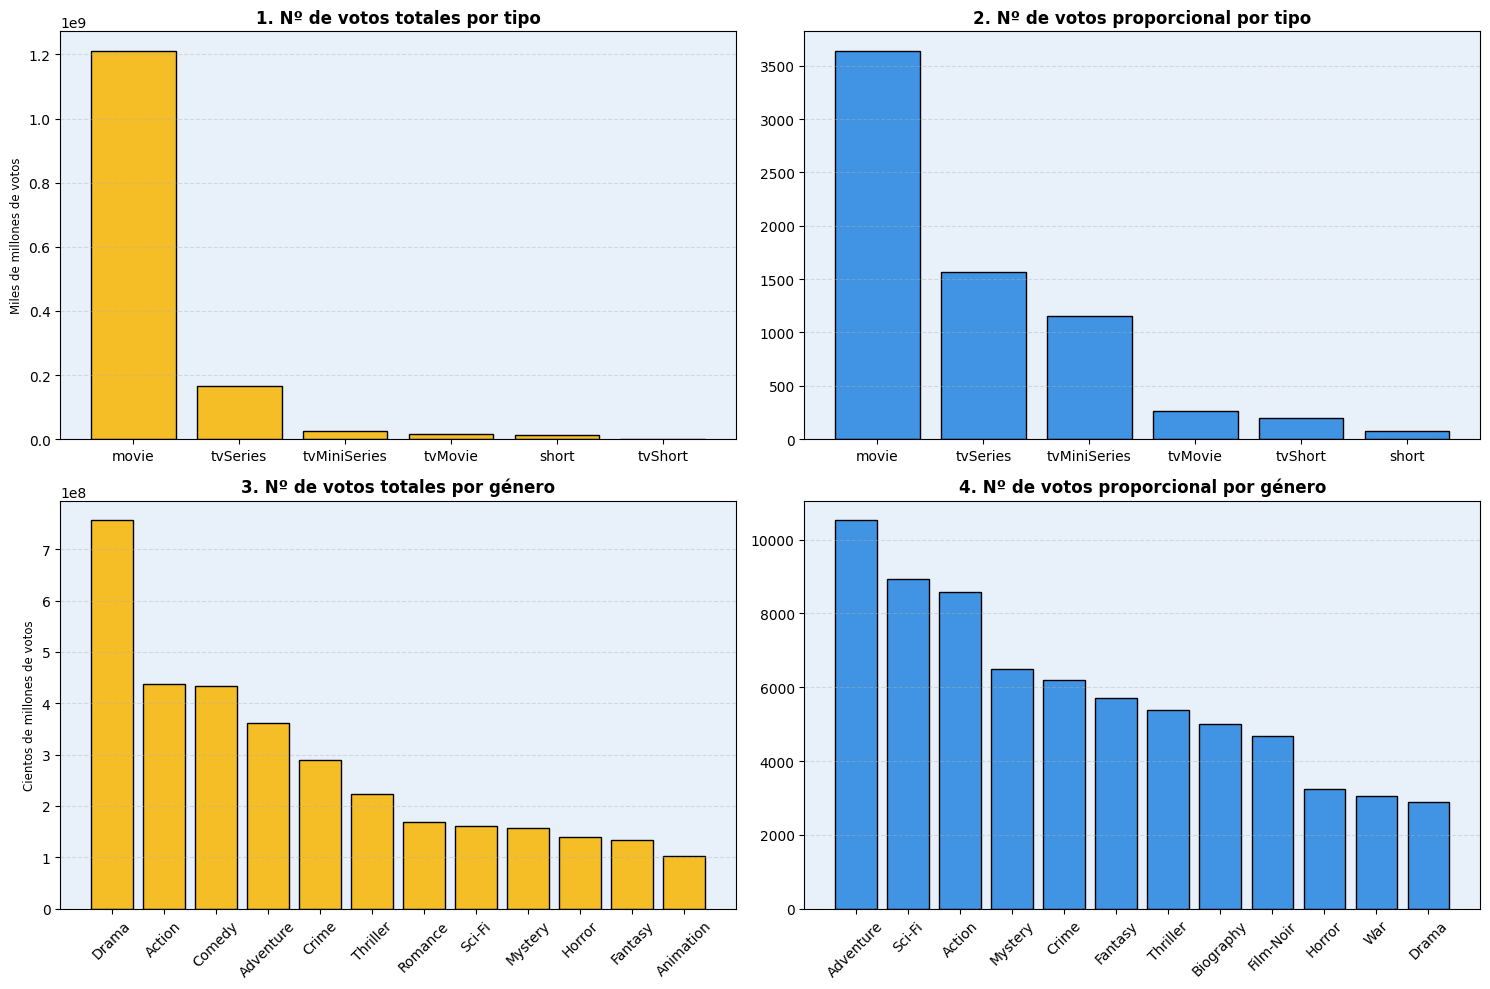

In [3]:
from src.data_visualization import gen_type_popular_bar

gen_type_popular_bar(Rat_Bas)

Antes de analizar las tablas es importante destacar que el tipo de serie,
La gráfica 1 nos muestra que la suma total de los votos claramente está dominada por las películas, aunque con una diferencia bastante marcada.  
En la gráfica 2, se tiene en cuenta el número de títulos de cada tipo (por ejemplo, el gran volumen de películas) para calcular una media de votos por título. Aunque el resultado general es similar, la diferencia se reduce considerablemente, lo que indica que parte de la popularidad de las películas se debe a su gran presencia en el conjunto de datos.   
**Esto nos indica que las películas no solo son el tipo de título más numeroso, sino también el que más interés genera en el público (más votos), lo que confirma su posición dominante en términos de popularidad, seguidas por las series.**

Sin embargo, en la gráfica 4, que considera el promedio de votos por género (votos proporcionales), el panorama cambia notablemente: el drama cae de la primera posición a la última (posición 12), y géneros como aventura, acción, crimen o ciencia ficción ascienden.  
**Esto nos muestra que, aunque géneros como el drama son muy frecuentes, no necesariamente son los más populares entre el público. Otros géneros, menos abundantes, generan más votos por título, lo que indica un mayor impacto o nivel de interés**

-   ### **<u>¿Qué géneros y tipos están mejor valorados?</u>**

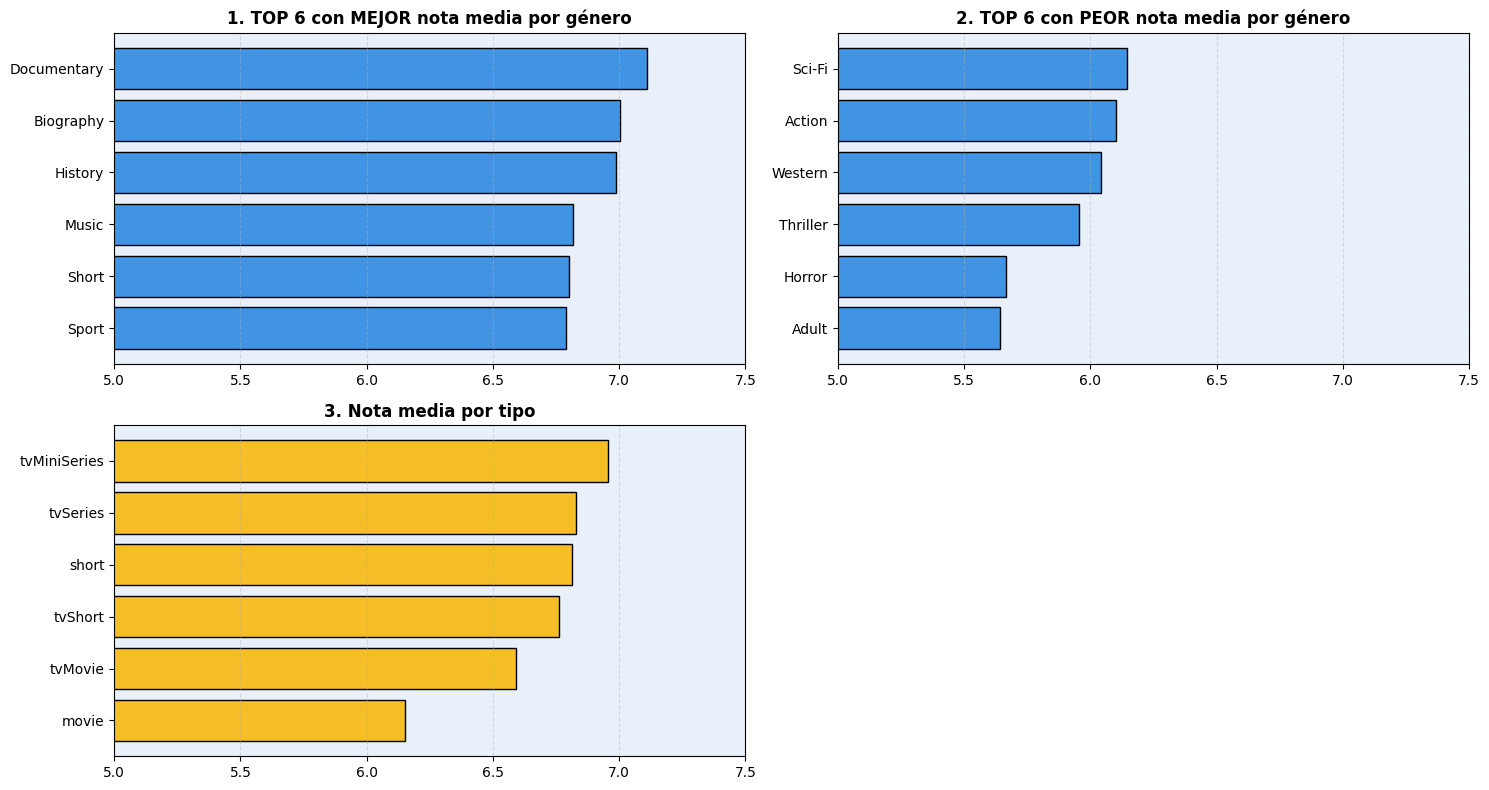

In [ ]:
from src.data_visualization import gen_type_most_popular_hbar

gen_type_most_popular_hbar(Rat_Bas)

El gráfico 1 muestra los 6 géneros mejor valorados, y el gráfico 2 presenta los 6 peor valorados.  Es importante destacar que las valoraciones en IMDb van de 1 a 10, pero en estas gráficas el eje se ha acotado entre 5 y 7.5 para facilitar la comparación visual.  
Aunque las medias se mantienen en un rango relativamente estrecho (aproximadamente entre 5.5 y 7), se aprecia que los géneros mejor puntuados son **Documental, Biografía e Histórico**, mientras que los peor valorados son **Horror y Adulto**.  
Además, géneros como Acción, Thriller o Ciencia ficción, que vimos anteriormente que recibían muchos votos, presentan notas medias más bajas. En cambio, los géneros con menos participación tienden a recibir mejores valoraciones, como Documental o Música.

En el gráfico 3 observamos como el tipo con mejores valoraciones es el de **Miniseries**, aunque con poca variación. Por el contrario, el tipo peor valorado es el de las **Películas**, a pesar de ser el típo con un mayor número de votos.   


**Esto sugiere una posible relación inversa entre cantidad de votos y valoración media: cuanto más popular es un género o tipo, más tiende a polarizar las opiniones, resultando en valoraciones medias más bajas.** 

-   ### **<u>Relación entre número de votos y valoración</u>**

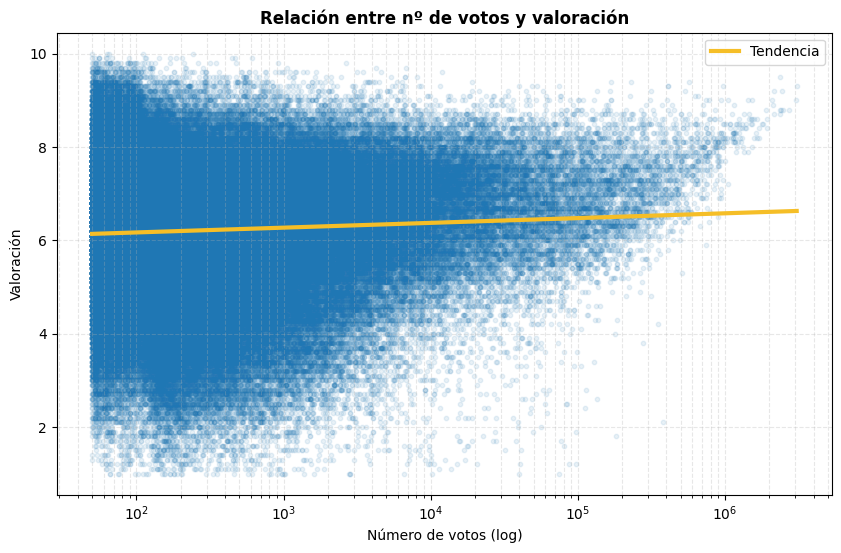

In [3]:
from src.data_visualization import valor_num_relation_scatter

valor_num_relation_scatter(Rat_Bas)

Se han eliminado los títulos con menos de 50 valoraciones, ya que con tan pocas votaciones la nota puede variar mucho y distorsionar la tendencia general.  
A partir de este filtrado, el gráfico muestra claramente dos patrones:

-   La gran mayoría de títulos acumulan pocas valoraciones.
-   Cuantos más votos recibe un título, más tiende a acercarse a valoraciones en el rango de 6 a 9.

**Esto sugiere que un mayor número de votos no solo aporta mayor fiabilidad a la nota, sino que además parece estar asociado a valoraciones medias ligeramente más altas.**

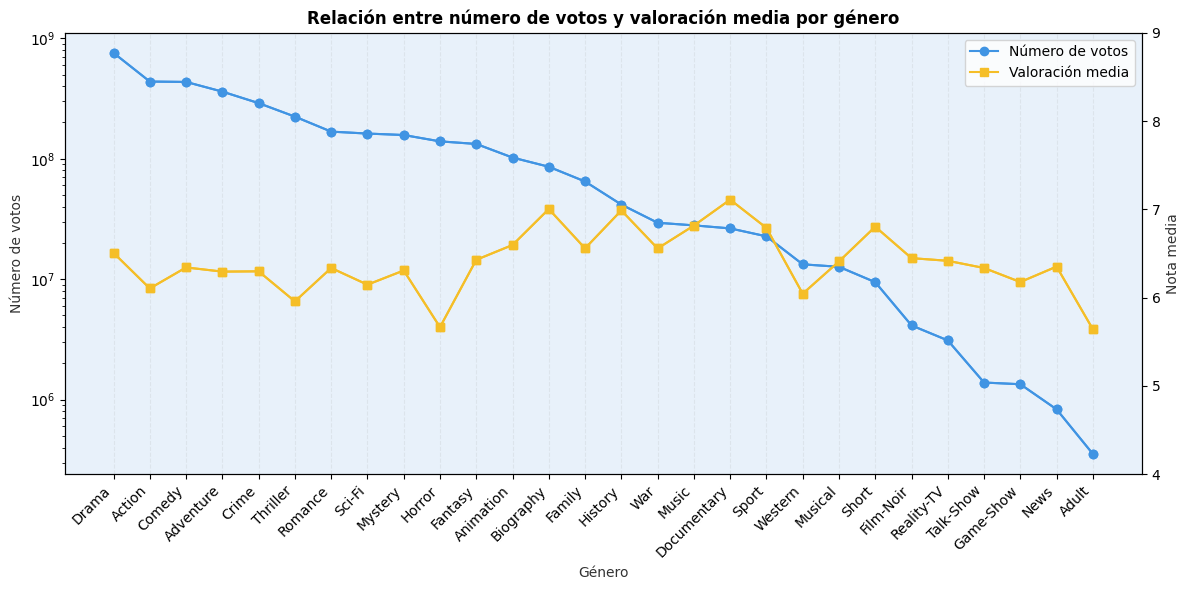

In [5]:
from src.data_visualization import valor_num_gen_relation_plot

valor_num_gen_relation_plot(Rat_Bas)

En esta gráfica los géneros se han ordenado según el número de votos para analizar si los más populares son también los mejor valorados. Sin embargo, la línea amarilla (valoración media) no muestra una tendencia clara en ese sentido.  

Se observan casos destacables: el género de **Terror**, aunque muy popular, presenta valoraciones notablemente más bajas que otros géneros con un volumen de votos similar; mientras que géneros como **Cortos o Documentales**, pese a tener menos visualizaciones, sobresalen con valoraciones más altas.  

Desde una perspectiva estratégica, la elección de género dependerá de cuánto se priorice el número de votos frente a la valoración media. Aquellos que combinan ambas métricas de forma equilibrada podrían ser **Drama, Comedia, Aventura, Romance, Misterio, Biografía, Histórico y Documental**. En cambio, géneros con menor potencial, según estos datos, serían **Terror, Western, Talk-show, Noticias y Adulto**.

-   ### **<u>Conclusión</u>**

En este apartado se ha definido el concepto de popularidad y se ha analizado la relación entre los géneros, los tipos, la valoración y el número de votos. También se ha explorado la correlación general entre el número de votos y la valoración.

Se han identificado cuáles géneros resultan más interesantes desde la perspectiva de la popularidad, y cuáles tienen menor impacto.

Además, respecto a los tipos, se ha llegado a una conclusión clara: el tipo "películas" es, con diferencia, el que acumula más votos (incluso de forma proporcional). Aunque es el tipo con una valoración media algo inferior (6.1 frente a más de 6.5 en otros tipos), según la definición de popularidad adoptada, el número de votos tendrá un mayor peso.

Dado que la diferencia en número de votos es significativa y con el fin de obtener conclusiones más específicas y fiables para el proyecto, se procederá a:  


-    **Trabajar exclusivamente con los titleType: "movie" y "tvMovie"**.

Por lo tanto, a partir de ahora se continuará el análisis con el dataset filtrado para películas, con el objetivo de aumentar la fiabilidad de las conclusiones.

In [ ]:
#Creamos el nuevo dataset con solo películas.

import os

df = titleBasics[titleBasics["titleType"].isin(["movie", "tvMovie"])].reset_index(drop=True)

output_path = os.path.join(os.getcwd(), "..", "data", "processed", "movie.basics.clean.pkl")

df.to_pickle(output_path)